In [3]:
# playing with redshifts and group data
import numpy as np
import h5py
import hdf5plugin
import pandas as pd

# Reading Snapshots
cat = '../jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_031.hdf5'
# open file
f = h5py.File(cat, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
print('BoxSize: ', BoxSize)
print('redshift: ', redshift)


BoxSize:  25.0
redshift:  0.10005315893672084


In [4]:
cat = '../jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_1/fof_subhalo_tab_031.hdf5'
# open file
f = h5py.File(cat, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
print('BoxSize: ', BoxSize)
print('redshift: ', redshift)

BoxSize:  25.0
redshift:  0.10005315893672084


In [5]:
import os
import numpy as np
import h5py

def combine_mass_data(filename, snap_file):
    # get parent directory
    data_directory = '../jovyan/Data/Sims/IllustrisTNG/CV/'
    
    # Create an empty list to store mass arrays
    mass_arrays_list = []

    # Initialize redshift to None
    redshift = None
    boxsize = None
    
    # Read the initial box size
    initial_boxsize = None
    
    # Iterate through directories and files
    for folder_name in os.listdir(data_directory):
        folder_path = os.path.join(data_directory, folder_name)

        # Check if it's a directory and its name starts with "CV_"
        # since the redshift is given by the number of the snapshot, we want to 
        # iterate and grab all the subhalos of a given redshift in each file CV_X
        
        if os.path.isdir(folder_path) and folder_name.startswith("CV_"):
            file_path = os.path.join(folder_path, filename)  # Use the provided filename to search for 
            # snapshot and subhalo data at given redshift.

            # Check if the file exists
            if os.path.isfile(file_path):
                with h5py.File(file_path, 'r') as hdf_file:
                    # Read the mass data from the HDF5 file
                    # Multiply masses by 10^10 for solar masses
                    mass_data = hdf_file['Subhalo/SubhaloMassType'][:,4]*1e10
                    
                    # Remove 0 values from the mass data
                    mass_data = mass_data[mass_data != 0]
                    
                    # Append the mass data array to the list
                    mass_arrays_list.append(mass_data)
                    
                    # Read redshift from the snapshot file (assuming they are all the same)
                    snapshot_file = os.path.join(folder_path, snap_file)
                    with h5py.File(snapshot_file, 'r') as snap_data:
                        redshift = snap_data['Header'].attrs[u'Redshift']
                        if redshift < 0.0001:
                            redshift = 0
                        rounded_redshift = round(redshift, 1) # round to nearest 0.1
                        
                        boxsize = snap_data['Header'].attrs[u'BoxSize']/1e3
                        if initial_boxsize is None:
                            initial_boxsize = boxsize

    # Calculate the comoving volume using the initial box size
    Vphys = initial_boxsize**3
    Vcom = Vphys * ((1+redshift)**3)

    # Combine the mass arrays into one NumPy array
    combined_mass_array = np.concatenate(mass_arrays_list)
    print('z : ', redshift)
    print('z rounded (used): ', rounded_redshift)
    print('Mass: ', combined_mass_array)
    print('BoxSize: ', boxsize)
    print('Comoving Volume: ', Vcom)
    print('*****')

    return combined_mass_array, rounded_redshift, Vcom

In [6]:
# tests ok, lets now get z = 0, z=0.5, z=1, z=2, z=3, z=5, z=6
# z = 0
mass_0, z_0, v_0 = combine_mass_data('fof_subhalo_tab_033.hdf5', 'snap_033.hdf5')


z :  0
z rounded (used):  0
Mass:  [6.4295463e+11 2.5150487e+10 3.3298905e+10 ... 6.1503985e+06 1.1504983e+07
 7.1605460e+06]
BoxSize:  25.0
Comoving Volume:  15625.0
*****


In [7]:
# z = 0.5
mass_05, z_05, v_05 = combine_mass_data('fof_subhalo_tab_025.hdf5', 'snap_025.hdf5')
# z = 0.95
mass_095, z_095, v_095 = combine_mass_data('fof_subhalo_tab_019.hdf5', 'snap_019.hdf5')
# z = 2
mass_2, z_2, v_2 = combine_mass_data('fof_subhalo_tab_010.hdf5', 'snap_010.hdf5')
# z = 3
mass_3, z_3, v_3 = combine_mass_data('fof_subhalo_tab_004.hdf5', 'snap_004.hdf5')
# z = 5
mass_5, z_5, v_5 = combine_mass_data('fof_subhalo_tab_001.hdf5', 'snap_001.hdf5')
# z = 6
mass_6, z_6, v_6 = combine_mass_data('fof_subhalo_tab_000.hdf5', 'snap_000.hdf5')

z :  0.46525063335034633
z rounded (used):  0.5
Mass:  [5.5973033e+11 4.0217735e+10 2.5526895e+10 ... 1.0378930e+07 4.6150664e+07
 1.1725086e+07]
BoxSize:  25.0
Comoving Volume:  49153.65074662243
*****
z :  0.9505313515850327
z rounded (used):  1.0
Mass:  [4.9930532e+11 5.4369329e+10 3.5654889e+10 ... 9.9108670e+06 1.0032812e+07
 7.1666600e+06]
BoxSize:  25.0
Comoving Volume:  115952.15695333038
*****
z :  2.0020281392528516
z rounded (used):  2.0
Mass:  [3.1135426e+11 8.6441861e+10 3.8908432e+10 ... 9.9739420e+06 1.4511811e+07
 1.3411024e+07]
BoxSize:  25.0
Comoving Volume:  422731.19981732656
*****
z :  2.9986464259849765
z rounded (used):  3.0
Mass:  [2.4252845e+11 4.2665157e+10 2.4622873e+10 ... 1.1534216e+07 1.3438157e+07
 1.3606816e+07]
BoxSize:  25.0
Comoving Volume:  998985.162980473
*****
z :  4.995933468164624
z rounded (used):  5.0
Mass:  [9.6767642e+09 3.4963800e+10 7.0018835e+08 ... 1.2393446e+07 8.2713960e+06
 1.0525959e+07]
BoxSize:  25.0
Comoving Volume:  3368142.37741

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def mass_fun(mass, V, nbins):
    # mass is our mass data in Msol
    # V is comoving Survey volume Vcom = Vphys(1+z)^3
    # nbins is number of bins

    M     = mass         #Read stellar masses in Msun
    logM  = np.log10(M)                     #Take logarithm

    # calc histogram
    Phi,edg = np.histogram(logM,bins=nbins) #Unnormalized histogram and bin edges

    dM    = edg[1] - edg[0]                 #Bin size
    Max   = edg[0:-1] + dM/2.               #Mass axis
    Phi   = Phi / V / dM                    #Normalize to volume and bin size

    return Phi, Max

In [9]:
# nbins = 10                              #Number of bins to divide data into
# V     = Vcom 
# test function for z=0
Phi_0, Max_0 = mass_fun(mass_0, v_0, 10)
Phi_05, Max_05 = mass_fun(mass_05, v_05, 10)
Phi_095, Max_095 = mass_fun(mass_095, v_095, 10)

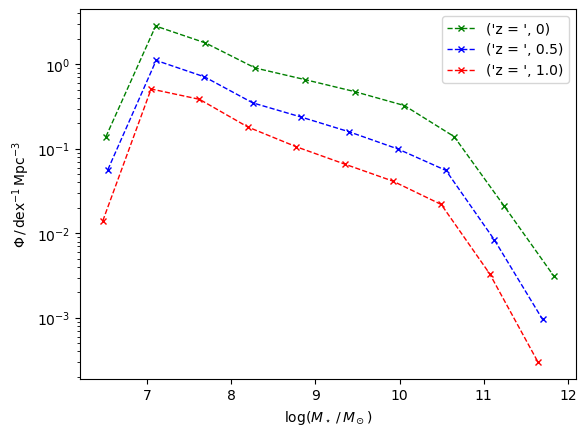

In [10]:
label_0 = 'z = ', z_0
label_05 = 'z = ', z_05
label_095 = 'z = ', z_095


plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')


# plot the data

plt.plot(Max_0,Phi_0, color='green', marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_0)
plt.plot(Max_05,Phi_05, color='blue', marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_05)
plt.plot(Max_095,Phi_095, color='red', marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_095)

plt.legend(loc="upper right")
